<a href="https://colab.research.google.com/github/cvbrandoe/coursHNS/blob/main/notebooks/ENC_HNS_AnaGeolinguistique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cours HNS - Master HNC - ENC

Autocorrélation Spatiale en Linguistique Computationnelle

Problématique : Analyse de la variation lexicale géographique
- Comment les variantes régionales d'un même concept se distribuent-elles ?
- Y a-t-il des clusters dialectaux identifiables ?
- Comment modéliser la diffusion géographique des emprunts linguistiques ?

Cas d'étude : Variations régionales en français (pain au chocolat vs chocolatine)
                et analyse d'emprunts anglais dans différentes régions

## DÉFINITIONS ET CONCEPTS CLÉS

📖 AUTOCORRÉLATION SPATIALE

Définition : L'autocorrélation spatiale mesure le degré de similarité entre des
observations géographiquement proches. En d'autres termes : "Est-ce que les
valeurs similaires ont tendance à se regrouper dans l'espace ?"

💡 Exemple linguistique :
Si on mesure l'usage du mot "chocolatine" dans différentes villes :
- AUTOCORRÉLATION POSITIVE : Les villes du Sud-Ouest qui disent "chocolatine"
  sont entourées d'autres villes qui disent aussi "chocolatine". Les valeurs
  similaires sont regroupées → cluster dialectal.

- AUTOCORRÉLATION NULLE : Une ville dit "chocolatine", sa voisine dit "pain au
  chocolat", la suivante dit "chocolatine"... distribution aléatoire.

- AUTOCORRÉLATION NÉGATIVE : Les villes qui disent "chocolatine" sont systématiquement
  entourées de villes qui disent "pain au chocolat" → effet de frontière linguistique.

Analogie : Imaginez une carte de température. S'il fait 25°C à Paris, il fera
probablement 23-27°C dans les villes proches. C'est de l'autocorrélation positive.

📖 INDICE DE MORAN (I de Moran)

Définition : Statistique qui quantifie l'autocorrélation spatiale globale.
C'est l'équivalent spatial du coefficient de corrélation de Pearson.

Formule simplifiée :
I = (N / W) × Σ Σ wᵢⱼ(xᵢ - x̄)(xⱼ - x̄) / Σ(xᵢ - x̄)²

Où :
- N = nombre de localisations
- wᵢⱼ = poids spatial (1 si i et j sont voisins, 0 sinon)
- xᵢ = valeur à la localisation i
- x̄ = moyenne générale
- W = somme de tous les poids

Interprétation des valeurs :

• I > 0 : Autocorrélation POSITIVE (similarité entre voisins)
  Valeurs typiques : 0.3 à 0.8 pour forte structure spatiale

• I ≈ 0 : PAS d'autocorrélation (distribution aléatoire)
  Valeurs typiques : -0.1 à +0.1

• I < 0 : Autocorrélation NÉGATIVE (dissimilarité entre voisins)
  Valeurs typiques : -0.3 à -0.8 pour forte alternance

💡 Exemple concret :
Imaginons 3 villes A, B, C en ligne :

A : 80% disent "chocolatine"

B : 75% disent "chocolatine" (voisine de A et C)

C : 78% disent "chocolatine"

→ Les voisines ont des valeurs similaires → I de Moran POSITIF

Maintenant si :

A : 80% disent "chocolatine"

B : 20% disent "chocolatine" (voisine de A et C)

C : 75% disent "chocolatine"

→ B est très différente de ses voisines → I de Moran plus faible ou négatif


📖 DIAGRAMME DE MORAN (Moran Scatterplot)

Définition : Graphique qui visualise la relation entre la valeur en un lieu et
la moyenne des valeurs chez ses voisins (lag spatial).

Axes :

- Axe X : Valeur standardisée au point i (écart à la moyenne)

- Axe Y : Moyenne standardisée des voisins du point i

Le graphique est divisé en 4 QUADRANTS :        

Quadrant 1 (HH) : Haute valeur, voisins hauts
→ Cœur d'une zone à haute fréquence
Exemple : Toulouse dans la zone "chocolatine"

Quadrant 2 (LH) : Basse valeur, voisins hauts
→ Point atypique dans zone haute
Exemple : Ville disant "pain au chocolat" entourée de villes "chocolatine"

Quadrant 3 (LL) : Basse valeur, voisins bas
→ Cœur d'une zone à basse fréquence
Exemple : Paris dans la zone "pain au chocolat"

Quadrant 4 (HL) : Haute valeur, voisins bas
→ Îlot isolé
Exemple : Ville isolée disant "chocolatine" entourée de villes "pain au chocolat"

💡 La pente de la ligne de régression = I de Moran




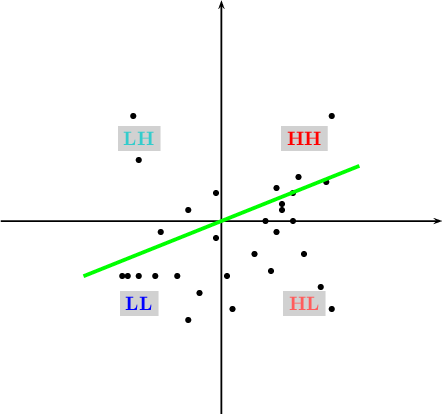



📖 LISA - Local Indicators of Spatial Association

Définition : Décomposition locale de l'indice de Moran global. Permet d'identifier
POUR CHAQUE POINT si son autocorrélation locale est significative.

Formule : Iᵢ = (xᵢ - x̄) × Σⱼ wᵢⱼ(xⱼ - x̄)

💡 Différence avec Moran global :
- Moran GLOBAL : Une seule valeur pour toute la carte → "Y a-t-il de l'autocorrélation ?"
- Moran LOCAL (LISA) : Une valeur par point → "OÙ est l'autocorrélation ?"

Types de CLUSTERS LISA identifiables :

🔴 CLUSTER HH (High-High) :
   Point à haute valeur entouré de voisins à haute valeur
   Interprétation linguistique : CŒUR DIALECTAL
   Exemple : Toulouse (85% "chocolatine") entourée de villes à 80-90%
   Signification : Zone homogène de forte utilisation

🔵 CLUSTER LL (Low-Low) :
   Point à basse valeur entouré de voisins à basse valeur
   Interprétation linguistique : CŒUR D'UNE VARIANTE ALTERNATIVE
   Exemple : Paris (10% "chocolatine") entourée de villes à 5-15%
   Signification : Zone homogène de faible utilisation

🟣 CLUSTER LH (Low-High) :
   Point à basse valeur entouré de voisins à haute valeur
   Interprétation linguistique : EXCEPTION LOCALE ou ZONE DE TRANSITION
   Exemple : Bordeaux (40% "chocolatine") au milieu du Sud-Ouest (80%)
   Signification : Influence externe, migration, ou facteur local spécifique

🟠 CLUSTER HL (High-Low) :
   Point à haute valeur entouré de voisins à basse valeur
   Interprétation linguistique : ÎLOT ISOLÉ ou INNOVATION LOCALE
   Exemple : Ville du Nord utilisant beaucoup un néologisme parisien
   Signification : Peut indiquer une diffusion précoce ou contact externe

⚪ NON SIGNIFICATIF :
   L'autocorrélation locale n'est pas statistiquement significative (p > 0.05)
   Interprétation : Le pattern local pourrait être dû au hasard

📖 SIGNIFICATIVITÉ STATISTIQUE (p-value)

Définition : Probabilité d'observer un tel pattern spatial si les données étaient
distribuées aléatoirement.

Test par permutation :

1. On mélange aléatoirement les valeurs entre les localisations (999 fois)
2. On recalcule I de Moran pour chaque permutation
3. On compare notre I observé à la distribution des I permutés

Interprétation :

• p < 0.05 : Pattern significatif (moins de 5% de chance que ce soit dû au hasard)

• p < 0.01 : Pattern très significatif (haute confiance)

• p > 0.05 : Pattern non significatif (pourrait être aléatoire)

💡 Exemple :

I de Moran observé = 0.65, p-value = 0.001

→ Seulement 0.1% des permutations aléatoires produisent un I ≥ 0.65

→ Le regroupement spatial est presque certainement réel, pas dû au hasard

📖 Z-SCORE

Définition : Nombre d'écarts-types entre la valeur observée et la valeur attendue sous l'hypothèse nulle (distribution aléatoire).

Formule : z = (I_observé - I_attendu) / écart-type

Interprétation :

• |z| > 1.96 : Significatif à 5% (p < 0.05)

• |z| > 2.58 : Significatif à 1% (p < 0.01)

• z > 0 : Autocorrélation positive

• z < 0 : Autocorrélation négative

💡 Exemple :

z = 4.5 → Pattern très significatif, autocorrélation positive forte

z = -3.2 → Pattern significatif, autocorrélation négative forte

z = 0.8 → Pas de pattern significatif


📖 NORMALISATION DES POIDS (Row Standardization)

Définition : Transformation de la matrice de poids pour que chaque ligne somme à 1.

💡 Pourquoi c'est important ?

Sans normalisation, une ville avec 10 voisins aurait plus d'influence qu'une
ville avec 2 voisins, ce qui biaiserait les calculs.

Exemple :

Ville A a 2 voisins : poids [1, 1] → normalisés [0.5, 0.5]

Ville B a 4 voisins : poids [1, 1, 1, 1] → normalisés [0.25, 0.25, 0.25, 0.25]

Maintenant chaque ville compte équitablement dans le calcul, quelle que soit
sa position géographique.

**Synthèse**

L'analyse d'**autocorrélation spatiale** en géolinguistique suit une démarche en plusieurs étapes. On commence par définir la **matrice de poids spatiaux** (W), qui précise quelles villes sont considérées comme voisines (par exemple, les 8 villes les plus proches).

Cette matrice sert ensuite à calculer l'**indice de Moran global** (I), qui mesure si les villes voisines ont des usages linguistiques similaires ou différents : un I positif indique que les valeurs similaires se regroupent (comme "chocolatine" concentrée dans le Sud-Ouest), tandis qu'un I proche de zéro signale une distribution aléatoire. Pour s'assurer que ce résultat n'est pas dû au hasard, on calcule la p-value et le z-score qui testent la **significativité statistique** de I.

Le **diagramme de Moran** permet ensuite de visualiser cette **autocorrélation** en plaçant chaque ville selon sa propre valeur et la moyenne de ses voisins, révélant quatre types de situations possibles (HH, LL, HL, LH).

Cependant, l'indice de Moran global ne nous dit pas où se trouvent précisément les zones intéressantes : c'est le rôle de l'analyse **LISA** qui calcule un indice local pour chaque ville.

Enfin, on identifie les clusters, c'est-à-dire les groupes de villes où l'**autocorrélation locale** est significative : les clusters HH révèlent les cœurs dialectaux, les clusters LL montrent les zones d'usage alternatif, tandis que les clusters HL et LH indiquent des îlots isolés ou des zones de transition.

L'ensemble de ces outils permet au linguiste de cartographier les frontières dialectales et de comprendre comment les phénomènes linguistiques se diffusent dans l'espace.



## PARTIE 0 : Installations

In [ ]:
!pip install numpy pandas matplotlib libpysal esda geopandas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from libpysal.weights import KNN, DistanceBand
from esda.moran import Moran, Moran_Local
import geopandas as gpd
from shapely.geometry import Point

# Configuration
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('seaborn-v0_8-darkgrid')

## PARTIE 1 : Génération de données linguistiques géolocalisées

In [ ]:
def generer_villes_francaises(n_villes=80):
    """
    Simule des villes françaises avec coordonnées approximatives
    """
    np.random.seed(42)

    # Régions françaises (coordonnées approximatives lat, lon)
    regions = {
        'Île-de-France': (48.8, 2.3, 8),
        'Sud-Ouest': (43.6, 1.4, 15),  # Zone "chocolatine"
        'Rhône-Alpes': (45.7, 4.8, 10),
        'Nord': (50.6, 3.0, 8),
        'Bretagne': (48.1, -1.7, 8),
        'PACA': (43.5, 5.4, 10),
        'Grand Est': (48.5, 6.2, 8),
        'Occitanie': (43.9, 3.8, 13)  # Zone "chocolatine"
    }

    villes = []
    ville_id = 0

    for region, (lat_center, lon_center, n_villes_region) in regions.items():
        for _ in range(n_villes_region):
            # Ajouter du bruit autour du centre régional
            lat = lat_center + np.random.normal(0, 0.5)
            lon = lon_center + np.random.normal(0, 0.5)

            villes.append({
                'ville_id': ville_id,
                'region': region,
                'lat': lat,
                'lon': lon
            })
            ville_id += 1

    return pd.DataFrame(villes)

def generer_frequences_linguistiques(df_villes, scenario='dialecte'):
    """
    Génère des fréquences d'usage de variantes linguistiques

    Scénarios disponibles :
    - 'dialecte' : variation régionale (pain au chocolat vs chocolatine)
    - 'emprunt' : diffusion d'anglicismes depuis les grandes villes
    - 'innovation' : propagation d'un néologisme
    """

    if scenario == 'dialecte':
        # Modèle : "chocolatine" dominant au Sud-Ouest et Occitanie
        def calculer_freq_chocolatine(row):
            if row['region'] in ['Sud-Ouest', 'Occitanie']:
                # Fort usage de "chocolatine" dans ces régions
                return np.random.beta(8, 2) * 100  # Moyenne ~80%
            elif row['region'] in ['PACA', 'Rhône-Alpes']:
                # Usage modéré (proximité géographique)
                return np.random.beta(3, 5) * 100  # Moyenne ~37%
            else:
                # Faible usage ailleurs
                return np.random.beta(1, 9) * 100  # Moyenne ~10%

        df_villes['freq_chocolatine'] = df_villes.apply(calculer_freq_chocolatine, axis=1)
        df_villes['freq_pain_chocolat'] = 100 - df_villes['freq_chocolatine']
        variable_cible = 'freq_chocolatine'

    elif scenario == 'emprunt':
        # Modèle : anglicismes plus fréquents dans grandes villes et au nord
        # Simuler l'intensité d'anglicismes (ex: "weekend", "shopping", etc.)
        def calculer_freq_anglicismes(row):
            base = 30  # Fréquence de base

            # Bonus selon la région
            if row['region'] == 'Île-de-France':
                base += 25  # Paris : forte influence internationale
            elif row['region'] in ['Nord', 'Grand Est']:
                base += 15  # Proximité pays anglophones/germanophones
            elif row['region'] in ['Bretagne', 'PACA']:
                base += 10  # Villes touristiques

            # Ajouter du bruit
            freq = base + np.random.normal(0, 8)
            return max(0, min(100, freq))

        df_villes['freq_anglicismes'] = df_villes.apply(calculer_freq_anglicismes, axis=1)
        variable_cible = 'freq_anglicismes'

    elif scenario == 'innovation':
        # Modèle : néologisme émergeant d'un point source et se diffusant
        # Ex: un nouveau mot d'argot né à Paris
        source_lat, source_lon = 48.8, 2.3  # Paris comme source

        def calculer_freq_neologisme(row):
            # Distance au point source
            distance = np.sqrt((row['lat'] - source_lat)**2 +
                             (row['lon'] - source_lon)**2)

            # Fréquence décroît avec la distance (modèle de diffusion)
            freq = 80 * np.exp(-distance / 2) + np.random.normal(0, 5)
            return max(0, min(100, freq))

        df_villes['freq_neologisme'] = df_villes.apply(calculer_freq_neologisme, axis=1)
        variable_cible = 'freq_neologisme'

    return df_villes, variable_cible

In [ ]:
#à tester avec les différents scénarios (dialecte, emprunt, innovation)

df_villes = generer_villes_francaises(n_villes=80)
df_villes, variable = generer_frequences_linguistiques(df_villes, scenario='innovation')

df_villes

,ville_id,region,lat,lon,freq_neologisme
0,0,Île-de-France,49.048357,2.230868,65.451565
1,1,Île-de-France,49.123844,3.061515,56.828340
2,2,Île-de-France,48.682923,2.182932,79.437062
3,3,Île-de-France,49.589606,2.683717,47.473499
4,4,Île-de-France,48.565263,2.571280,71.680608
...,...,...,...,...,...
75,75,Occitanie,44.025246,3.973224,9.544096
76,76,Occitanie,43.559988,3.916127,0.000000
77,77,Occitanie,44.046536,3.442824,7.874136
78,78,Occitanie,44.832887,4.036916,5.867903


## PARTIE 2 : Calcul de l'autocorrélation spatiale linguistique

In [ ]:
def calculer_moran_linguistique(gdf, variable, methode_voisinage='knn', k=8, distance_km=150):
    """
    Calcule l'indice de Moran pour une variable linguistique

    Parameters:
    -----------
    methode_voisinage : 'knn' (k plus proches voisins) ou 'distance' (seuil de distance)
    k : nombre de voisins pour KNN
    distance_km : distance seuil en km (1 degré ≈ 111 km)
    """

    if methode_voisinage == 'knn':
        w = KNN.from_dataframe(gdf, k=k)
        description = f"{k} plus proches voisins"
    else:
        # Convertir km en degrés (approximatif)
        distance_deg = distance_km / 111
        w = DistanceBand.from_dataframe(gdf, threshold=distance_deg)
        description = f"seuil de {distance_km} km"

    w.transform = 'r'  # Normalisation

    # Calculer Moran
    moran = Moran(gdf[variable], w)

    return moran, w, description

def calculer_lisa_linguistique(gdf, variable, w):
    """
    Calcule les indicateurs locaux (LISA) pour identifier les zones dialectales
    """
    lisa = Moran_Local(gdf[variable], w)
    return lisa


## PARTIE 3 : Visualisations spécifiques à la linguistique

In [ ]:
def visualiser_carte_linguistique(gdf, variable, titre, cmap='RdYlBu_r'):
    """
    Carte choroplèthe des fréquences linguistiques
    """
    fig, ax = plt.subplots(figsize=(12, 10))

    # Créer la carte
    scatter = ax.scatter(gdf['lon'], gdf['lat'],
                        c=gdf[variable],
                        s=150,
                        cmap=cmap,
                        edgecolors='black',
                        linewidth=0.5,
                        alpha=0.8)

    # Ajouter les contours approximatifs de la France
    ax.set_xlim(-5, 9)
    ax.set_ylim(41, 52)

    plt.colorbar(scatter, ax=ax, label='Fréquence (%)')
    ax.set_title(titre, fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel('Longitude', fontsize=11)
    ax.set_ylabel('Latitude', fontsize=11)
    ax.grid(True, alpha=0.3, linestyle='--')

    plt.tight_layout()
    return fig

def visualiser_moran_linguistique(gdf, variable, w, moran):
    """
    Diagramme de Moran avec interprétation linguistique
    """
    # Standardiser
    z = (gdf[variable] - gdf[variable].mean()) / gdf[variable].std()
    lag = w.sparse @ z

    fig, ax = plt.subplots(figsize=(11, 9))

    # Points colorés par région
    for region in gdf['region'].unique():
        mask = gdf['region'] == region
        ax.scatter(z[mask], lag[mask], alpha=0.6, s=50, label=region)

    # Ligne de régression
    ax.plot(z, moran.I * z, 'r-', linewidth=2.5,
           label=f"I de Moran = {moran.I:.3f}\np-value = {moran.p_sim:.4f}")

    # Quadrants
    ax.axhline(y=0, color='k', linestyle='--', alpha=0.3, linewidth=1)
    ax.axvline(x=0, color='k', linestyle='--', alpha=0.3, linewidth=1)

    # Annotations linguistiques
    ax.text(1.8, 1.8, 'HH\nZones à haute\nfréquence groupées',
           fontsize=10, ha='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    ax.text(-1.8, 1.8, 'LH\nIlot de faible usage\nentre hautes fréquences',
           fontsize=10, ha='center', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
    ax.text(-1.8, -1.8, 'LL\nZones à faible\nfréquence groupées',
           fontsize=10, ha='center', bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))
    ax.text(1.8, -1.8, 'HL\nIlot de haute fréquence\nisolé',
           fontsize=10, ha='center', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

    ax.set_xlabel('Fréquence standardisée', fontsize=12)
    ax.set_ylabel('Lag spatial (voisinage)', fontsize=12)
    ax.set_title('Diagramme de Moran - Autocorrélation Spatiale Linguistique',
                fontsize=13, fontweight='bold')
    ax.legend(loc='upper left', fontsize=8, ncol=2)
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    return fig

def visualiser_zones_dialectales(gdf, variable, lisa):
    """
    Carte des zones dialectales identifiées par LISA
    """
    # Clusters significatifs
    sig = lisa.p_sim < 0.05

    clusters = np.zeros(len(gdf))
    clusters[sig & (lisa.q == 1)] = 1  # HH - Zone dialectale cohérente
    clusters[sig & (lisa.q == 2)] = 2  # LH - Zone atypique
    clusters[sig & (lisa.q == 3)] = 3  # LL - Zone de faible usage cohérente
    clusters[sig & (lisa.q == 4)] = 4  # HL - Ilot isolé

    gdf_copy = gdf.copy()
    gdf_copy['cluster'] = clusters

    fig, ax = plt.subplots(figsize=(12, 10))

    colors = {
        0: 'lightgray',
        1: '#d62728',  # Rouge : forte fréquence groupée
        2: '#9467bd',  # Violet : transition
        3: '#1f77b4',  # Bleu : faible fréquence groupée
        4: '#ff7f0e'   # Orange : anomalie
    }

    labels = {
        0: 'Non significatif',
        1: 'Zone dialectale principale (HH)',
        2: 'Zone de transition (LH)',
        3: 'Zone d\'usage alternatif (LL)',
        4: 'Îlot isolé (HL)'
    }

    for cluster_type in range(5):
        mask = gdf_copy['cluster'] == cluster_type
        if mask.any():
            ax.scatter(gdf_copy[mask]['lon'], gdf_copy[mask]['lat'],
                      c=colors[cluster_type], s=180,
                      label=labels[cluster_type],
                      edgecolors='black', linewidth=1, alpha=0.85)

    ax.set_xlim(-5, 9)
    ax.set_ylim(41, 52)
    ax.set_title('Zones Dialectales et Clusters Linguistiques\n(Analyse LISA)',
                fontsize=14, fontweight='bold')
    ax.set_xlabel('Longitude', fontsize=11)
    ax.set_ylabel('Latitude', fontsize=11)
    ax.legend(loc='upper left', fontsize=9, framealpha=0.9)
    ax.grid(True, alpha=0.3, linestyle='--')

    plt.tight_layout()
    return fig

## PARTIE 4 : Analyse complète

In [ ]:
def analyse_linguistique_complete(scenario='dialecte', methode_voisinage='knn'):
    """
    Analyse complète d'autocorrélation spatiale linguistique
    """
    print(f"\n{'='*75}")
    print(f"ANALYSE D'AUTOCORRÉLATION SPATIALE LINGUISTIQUE")
    print(f"Scénario : {scenario.upper()}")
    print(f"{'='*75}\n")

    # 1. Générer les données
    print("1. Génération des données géolinguistiques...")
    df_villes = generer_villes_francaises(n_villes=80)
    df_villes, variable = generer_frequences_linguistiques(df_villes, scenario=scenario)

    # Créer GeoDataFrame
    geometry = [Point(lon, lat) for lon, lat in zip(df_villes['lon'], df_villes['lat'])]
    gdf = gpd.GeoDataFrame(df_villes, geometry=geometry)

    print(f"   ✓ {len(gdf)} villes analysées")
    print(f"   ✓ Variable étudiée : {variable}")
    print(f"   ✓ Fréquence moyenne : {gdf[variable].mean():.2f}%")
    print(f"   ✓ Écart-type : {gdf[variable].std():.2f}%")

    # 2. Statistiques descriptives par région
    print("\n2. Statistiques par région :")
    stats_region = gdf.groupby('region')[variable].agg(['mean', 'std', 'count'])
    print(stats_region.round(2))

    # 3. Calculer Moran global
    print(f"\n3. Calcul de l'indice de Moran global ({methode_voisinage})...")
    moran, w, description = calculer_moran_linguistique(
        gdf, variable, methode_voisinage=methode_voisinage
    )

    print(f"   ✓ Méthode de voisinage : {description}")
    print(f"   ✓ I de Moran = {moran.I:.4f}")
    print(f"   ✓ Valeur attendue sous H0 = {moran.EI:.4f}")
    print(f"   ✓ z-score = {moran.z_sim:.4f}")
    print(f"   ✓ p-value (simulation) = {moran.p_sim:.4f}")

    # Interprétation linguistique
    print("\n   📊 INTERPRÉTATION LINGUISTIQUE :")
    if moran.p_sim < 0.05:
        if moran.I > 0.3:
            print(f"   ✓ Autocorrélation FORTEMENT POSITIVE (I={moran.I:.3f})")
            print(f"   → Forte structuration géographique de la variation linguistique")
            print(f"   → Existence de zones dialectales bien délimitées")
        elif moran.I > 0:
            print(f"   ✓ Autocorrélation MODÉRÉMENT POSITIVE (I={moran.I:.3f})")
            print(f"   → Tendance au regroupement géographique")
            print(f"   → Zones linguistiques moins tranchées")
        else:
            print(f"   ✓ Autocorrélation NÉGATIVE (I={moran.I:.3f})")
            print(f"   → Les villes voisines tendent à avoir des usages différents")
            print(f"   → Possible effet de frontière linguistique")
    else:
        print(f"   ✗ Pas d'autocorrélation spatiale significative")
        print(f"   → Distribution géographique aléatoire de la variante")
        print(f"   → Facteurs non-géographiques prédominent")

    # 4. Analyse locale (LISA)
    print(f"\n4. Analyse locale (LISA) - Identification des zones dialectales...")
    lisa = calculer_lisa_linguistique(gdf, variable, w)
    n_sig = (lisa.p_sim < 0.05).sum()
    print(f"   ✓ {n_sig}/{len(gdf)} villes avec patterns locaux significatifs")

    # Compter les types de clusters
    sig = lisa.p_sim < 0.05
    n_hh = np.sum(sig & (lisa.q == 1))
    n_lh = np.sum(sig & (lisa.q == 2))
    n_ll = np.sum(sig & (lisa.q == 3))
    n_hl = np.sum(sig & (lisa.q == 4))

    print(f"   • Zones HH (haute fréquence groupée) : {n_hh}")
    print(f"   • Zones LL (faible fréquence groupée) : {n_ll}")
    print(f"   • Zones LH (transitions) : {n_lh}")
    print(f"   • Zones HL (îlots isolés) : {n_hl}")

    # 5. Visualisations
    print("\n5. Génération des visualisations...")

    # Noms de variables pour affichage
    noms_variables = {
        'freq_chocolatine': 'Usage de "chocolatine" (%)',
        'freq_anglicismes': 'Fréquence des anglicismes (%)',
        'freq_neologisme': 'Adoption du néologisme (%)'
    }
    titre_var = noms_variables.get(variable, variable)

    # Carte de distribution
    visualiser_carte_linguistique(gdf, variable,
                                  f'Distribution géographique - {titre_var}')
    plt.show()

    # Diagramme de Moran
    visualiser_moran_linguistique(gdf, variable, w, moran)
    plt.show()

    # Zones dialectales
    visualiser_zones_dialectales(gdf, variable, lisa)
    plt.show()

    print("\n✓ Analyse terminée !")
    print(f"{'='*75}\n")

    return gdf, moran, lisa

## EXERCICES PRATIQUES

Exercice 1 : Comparaison des scénarios linguistiques

Exécutez l'analyse pour les trois scénarios :

a) analyse_linguistique_complete(scenario='dialecte')
   → Variation régionale : "chocolatine" vs "pain au chocolat"

b) analyse_linguistique_complete(scenario='emprunt')
   → Diffusion des anglicismes

c) analyse_linguistique_complete(scenario='innovation')
   → Propagation d'un néologisme depuis Paris

Questions :
- Quel scénario présente la plus forte autocorrélation spatiale ?
- Comment interpréter les différences d'I de Moran entre scénarios ?
- Quels processus sociolinguistiques pourraient expliquer ces patterns ?



ANALYSE D'AUTOCORRÉLATION SPATIALE LINGUISTIQUE
Scénario : DIALECTE

1. Génération des données géolinguistiques...
   ✓ 80 villes analysées
   ✓ Variable étudiée : freq_chocolatine
   ✓ Fréquence moyenne : 42.01%
   ✓ Écart-type : 31.59%

2. Statistiques par région :
                mean    std  count
region                            
Bretagne       10.97   8.33      8
Grand Est      13.91  11.17      8
Nord            8.38   5.95      8
Occitanie      75.86  15.02     13
PACA           37.87  12.35     10
Rhône-Alpes    41.65  21.02     10
Sud-Ouest      80.40  12.11     15
Île-de-France  13.42   6.84      8

3. Calcul de l'indice de Moran global (knn)...
   ✓ Méthode de voisinage : 8 plus proches voisins
   ✓ I de Moran = 0.8302
   ✓ Valeur attendue sous H0 = -0.0127
   ✓ z-score = 16.3903
   ✓ p-value (simulation) = 0.0010

   📊 INTERPRÉTATION LINGUISTIQUE :
   ✓ Autocorrélation FORTEMENT POSITIVE (I=0.830)
   → Forte structuration géographique de la variation linguistique
   → Ex

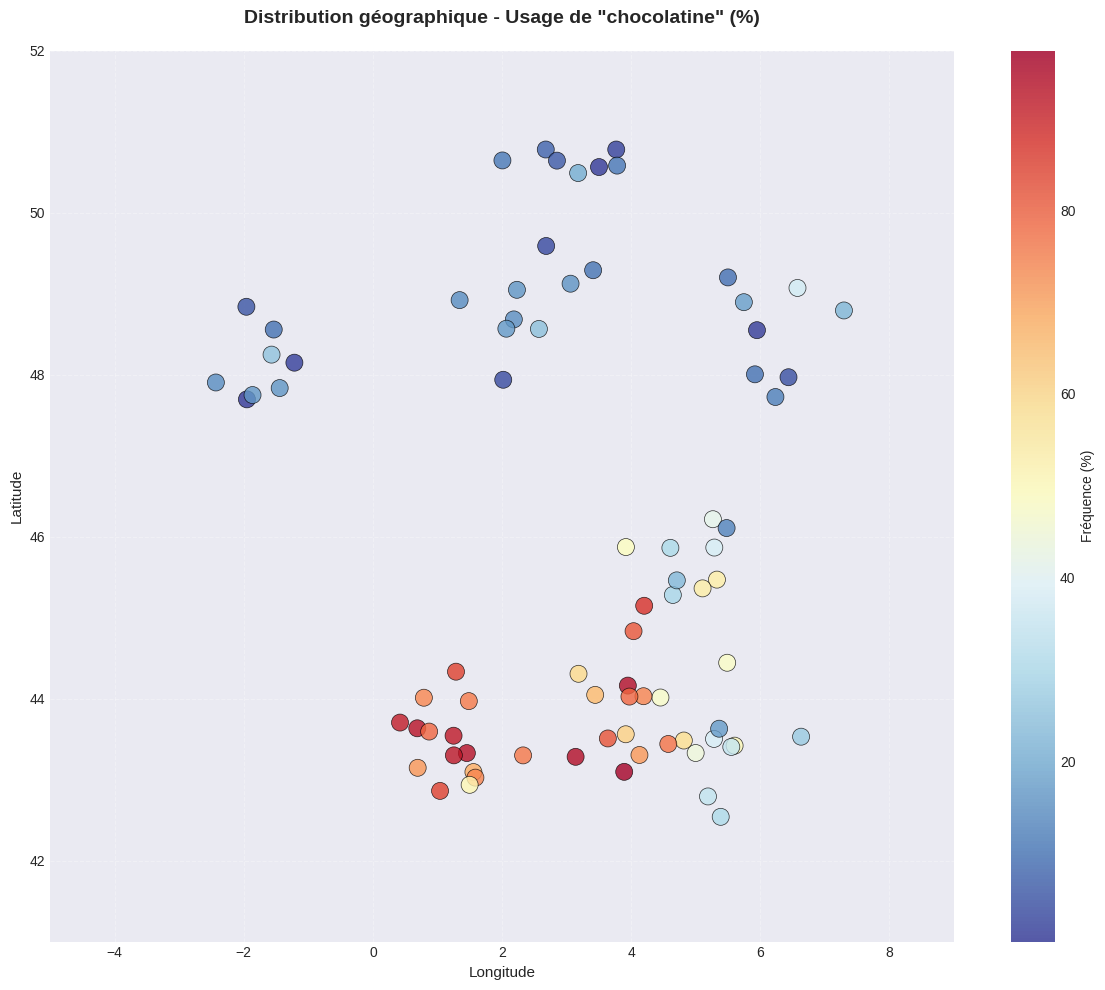

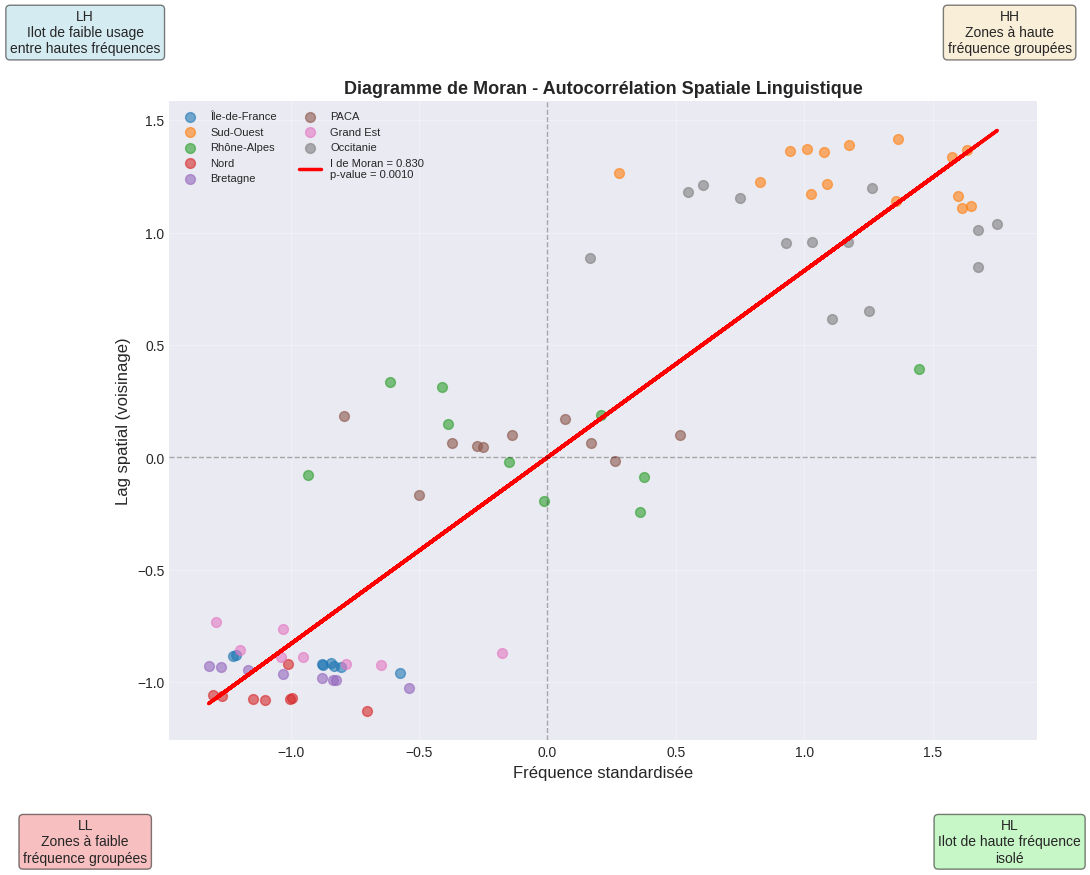

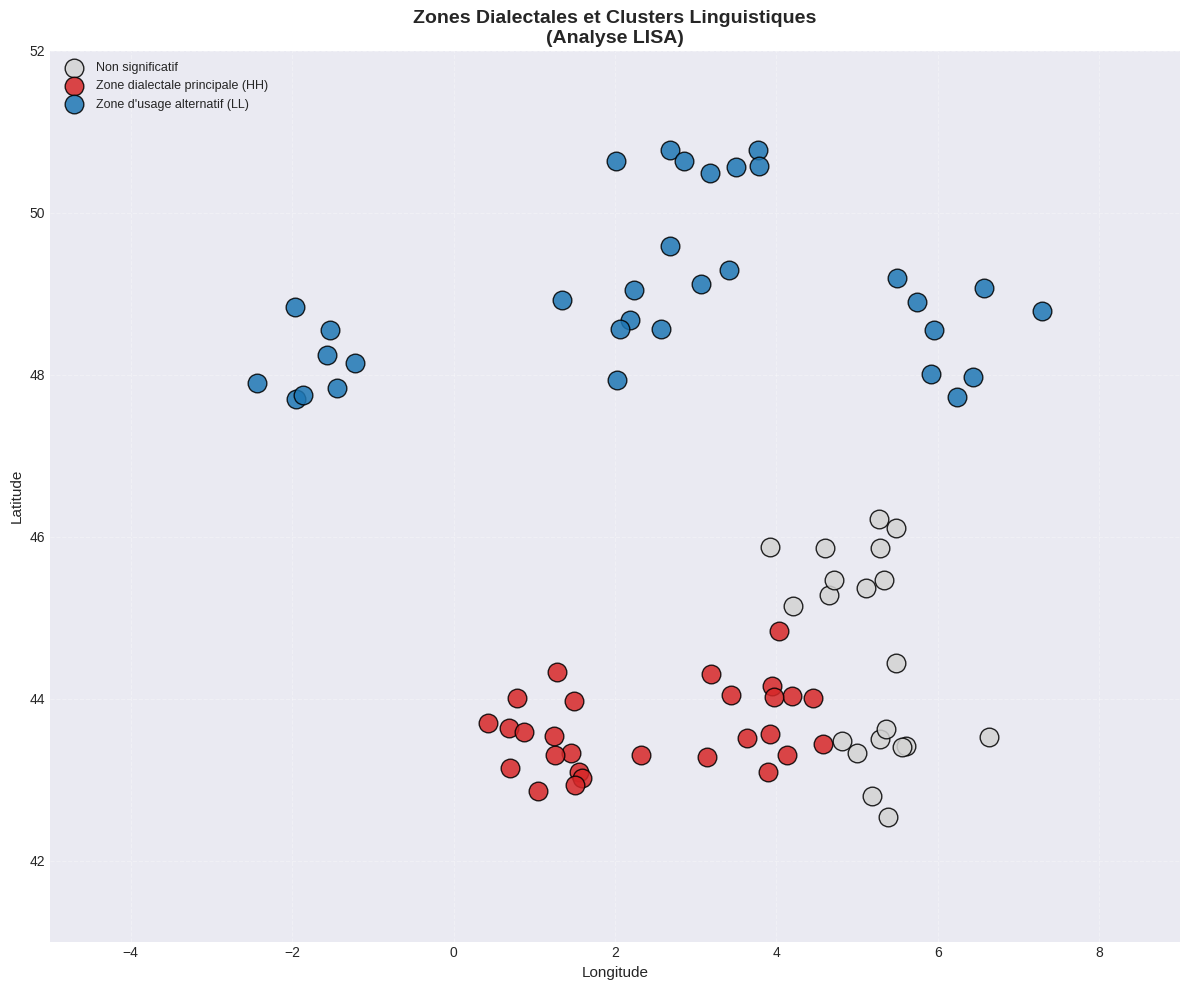


✓ Analyse terminée !



In [ ]:
## EXEMPLE D'EXÉCUTION : scénario dialectal (chocolatine vs pain au chocolat)

if __name__ == "__main__":
    # Analyser le scénario dialectal (chocolatine vs pain au chocolat)

    gdf, moran, lisa = analyse_linguistique_complete(
        scenario='dialecte',
        methode_voisinage='knn'
    )
    # Pour tester les autres scénarios, décommentez :
    # analyse_linguistique_complete(scenario='emprunt')
    # analyse_linguistique_complete(scenario='innovation')

Pour aller plus loin :

Exercice 2 : Impact de la définition du voisinage

Testez différentes méthodes de voisinage :

analyse_linguistique_complete(scenario='dialecte', methode_voisinage='knn')

analyse_linguistique_complete(scenario='dialecte', methode_voisinage='distance')

Questions :
- La valeur de I de Moran change-t-elle ?
- Quelle méthode est la plus appropriée pour des données linguistiques ?
- Pourquoi le choix du voisinage est-il crucial en géolinguistique ?

Exercice 3 : Interprétation des clusters LISA

En observant la carte des zones dialectales :

a) Identifiez les "cœurs dialectaux" (zones HH)
b) Localisez les zones de transition (LH)
c) Trouvez d'éventuels îlots isolés (HL)

Questions :
- Ces zones correspondent-elles à des frontières administratives ?
- Quels facteurs historiques/sociaux peuvent expliquer ces frontières ?
- Comment ces zones évoluent-elles avec le temps (hypothèse) ?